In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
# ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis
# adfuller_result = adfuller(series, autolag="AIC")
# tankData = pd.read_csv("waterTankNew.csv", header=0, index_col=0)
tankData = pd.read_csv("waterTank-Golden.csv", header=0, index_col=0)
attr = ["WaterTank1.inFlow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1.Tank1InFlow", "Tank1.Tank2OutFlow", "Tank1.WaterTank2.I1.state", "wt3_valve", "Tank2.puddle", "Tank2.Tank3OutFlow", "Tank2.level"]
# adfuller_result = adfuller(tankData["wt3_valve"].values, autolag="AIC")

for feature in attr:
    
    adfuller_result = adfuller(tankData[feature].values, autolag="AIC")
    print("Stationarity metrics for each series")
    print(f'ADF Statistic: {adfuller_result[0]}')
    print(f'p-value: {adfuller_result[1]}')

    for key, value in adfuller_result[4].items():
        print('Critical Values: ')
        print(f'    {key}, {value}')

    print("Conclusion")
    if adfuller_result[1] > 0.05:
        print("Series is not stationary")
    else:
        print("Series is stationary")
    print("\n\n")

Stationarity metrics for each series
ADF Statistic: -8.641454391191242
p-value: 5.4119873610927735e-14
Critical Values: 
    1%, -3.4307872524778626
Critical Values: 
    5%, -2.861733246639804
Critical Values: 
    10%, -2.56687286052898
Conclusion
Series is stationary



Stationarity metrics for each series
ADF Statistic: -13.259791923928406
p-value: 8.44358254573481e-25
Critical Values: 
    1%, -3.4307872524778626
Critical Values: 
    5%, -2.861733246639804
Critical Values: 
    10%, -2.56687286052898
Conclusion
Series is stationary



Stationarity metrics for each series
ADF Statistic: -7.758051791259566
p-value: 9.618898562301252e-12
Critical Values: 
    1%, -3.4307872524778626
Critical Values: 
    5%, -2.861733246639804
Critical Values: 
    10%, -2.56687286052898
Conclusion
Series is stationary



Stationarity metrics for each series
ADF Statistic: -8.641454391191242
p-value: 5.4119873610927735e-14
Critical Values: 
    1%, -3.4307872524778626
Critical Values: 
    5%, -2.86

### Visualise the data

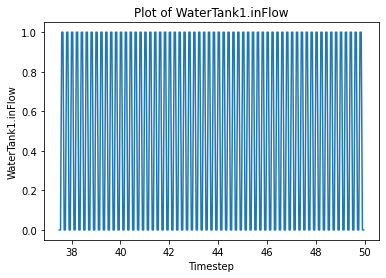

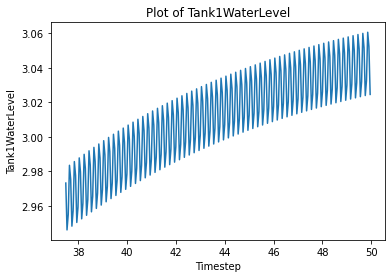

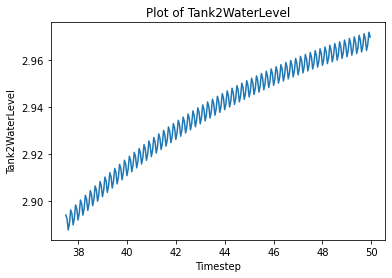

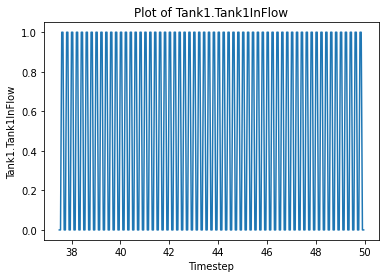

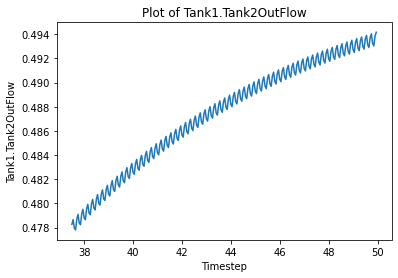

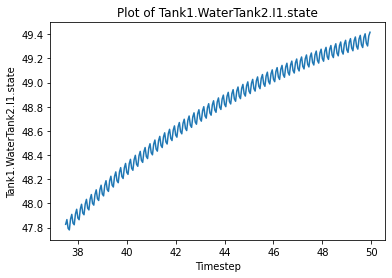

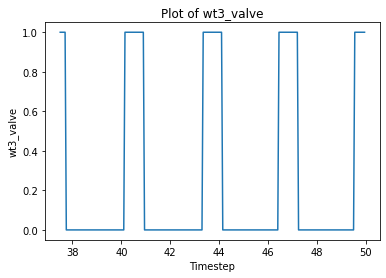

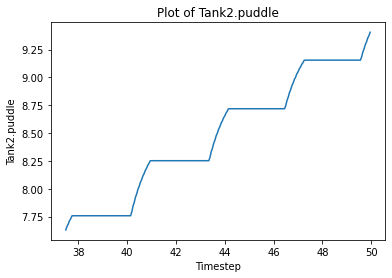

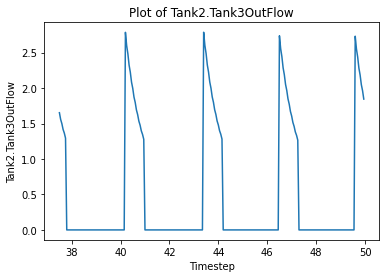

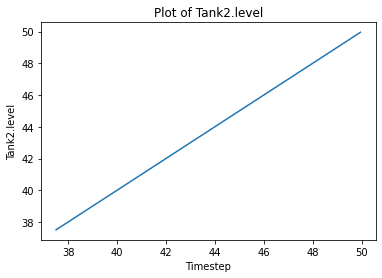

In [3]:
from pandas import read_csv
# mydata = read_csv('waterTankNew.csv', header=0, index_col=0)
mydata = read_csv('waterTank-Golden.csv', header=0, index_col=0)
# attr = ["wt3_valve", "Tank1InFlow", "Tank1WaterLevel", "Tank3OutFlow", "Tank2.level"]
attr = ["WaterTank1.inFlow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1.Tank1InFlow", "Tank1.Tank2OutFlow", "Tank1.WaterTank2.I1.state", "wt3_valve", "Tank2.puddle", "Tank2.Tank3OutFlow", "Tank2.level"]
for i in range(len(attr)):
    title = "Plot of "+str(attr[i])
#     actual = mydata.iloc[:2000,i]
#     actual = mydata.iloc[:2000,i]
    actual = mydata.iloc[750:1000,i]
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel(attr[i])
#     plt.plot(actual, label="original")
    plt.plot(actual)
#     plt.legend()
    plt.show()

In [4]:
# multivariate output stacked lstm example
import pandas as pd
from numpy import array
from numpy import hstack, vstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Bidirectional, RepeatVector, TimeDistributed
from keras.layers.core import Dropout
from sklearn.preprocessing import MinMaxScaler
from pandas import read_csv
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np



# split a multivariate sequence into samples
def split_sequences(sequences, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the dataset
        if out_end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# define input sequence

# Read the data
# data = read_csv('waterTank.csv', header=0, index_col=0)
# data = read_csv('outputs.csv', header=0, index_col=0)
# data = read_csv('trig.csv', header=0, index_col=0)
data = read_csv('waterTank-Golden.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
print(f'The shape of the raw_data before scaling is {raw_data.shape}')
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(raw_data)

n_train = 12000
dataset = scaled_data[0:n_train,:]
# choose a number of time steps
# n_steps_in, n_steps_out = 50, 100
n_steps_in, n_steps_out = 50, 100

# convert into input/output
X, y = split_sequences(dataset, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(25, activation='relu', input_shape=(n_steps_in, n_features)))
model.add(RepeatVector(n_steps_out))
model.add(LSTM(25, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(50, activation='relu')))
model.add(TimeDistributed(Dense(n_features)))
# model.add(TimeDistributed(Dense(1)))
model.compile(optimizer='adam', loss='mse')
# fit model
train_history = model.fit(X, y, epochs=60, verbose=2, shuffle=False)

# demonstrate Direct prediction
# x_inp = raw_data[n_train:n_train+n_steps,:]
x_inp = scaled_data[n_train:n_train+n_steps_in,:]
print(f'Initial shape of x_input {x_inp.shape}')
x_input = x_inp.reshape((1, n_steps_in, n_features))
yhat = model.predict(x_input, verbose=0)
print(f'The shape of yhat after prediction is {yhat.shape}')
yhat = yhat.reshape(n_steps_out, n_features)
print(f'The new shape of yhat  is {yhat.shape}')
inv_yhat = scaler.inverse_transform(yhat)
print(inv_yhat)

print("-------Learning Curve--------")
plt.plot(train_history.history['loss'], label='train')
# plt.plot(train_history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

model.summary()

#save the model to disk
model.save('Value-Flip.h5')
print("Model saved!")

The shape of the raw_data before scaling is (15001, 11)
Epoch 1/60
371/371 - 70s - loss: 0.1033 - 70s/epoch - 190ms/step
Epoch 2/60
371/371 - 63s - loss: 0.0760 - 63s/epoch - 169ms/step
Epoch 3/60
371/371 - 61s - loss: 0.0747 - 61s/epoch - 165ms/step
Epoch 4/60
371/371 - 63s - loss: 0.0738 - 63s/epoch - 169ms/step
Epoch 5/60
371/371 - 62s - loss: 0.0762 - 62s/epoch - 167ms/step
Epoch 6/60
371/371 - 63s - loss: 0.0739 - 63s/epoch - 169ms/step
Epoch 7/60
371/371 - 63s - loss: 0.0736 - 63s/epoch - 170ms/step
Epoch 8/60
371/371 - 62s - loss: 0.0734 - 62s/epoch - 168ms/step
Epoch 9/60
371/371 - 62s - loss: 0.0730 - 62s/epoch - 168ms/step
Epoch 10/60
371/371 - 63s - loss: 0.0738 - 63s/epoch - 169ms/step
Epoch 11/60
371/371 - 62s - loss: 0.0736 - 62s/epoch - 168ms/step
Epoch 12/60
371/371 - 63s - loss: 0.0720 - 63s/epoch - 169ms/step
Epoch 13/60
371/371 - 62s - loss: 0.0630 - 62s/epoch - 168ms/step
Epoch 14/60
371/371 - 62s - loss: 0.0559 - 62s/epoch - 166ms/step
Epoch 15/60


KeyboardInterrupt: 

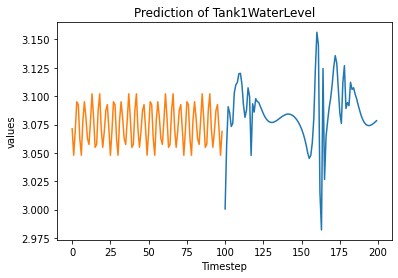

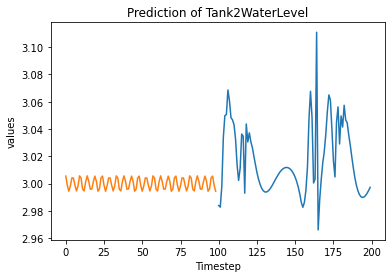

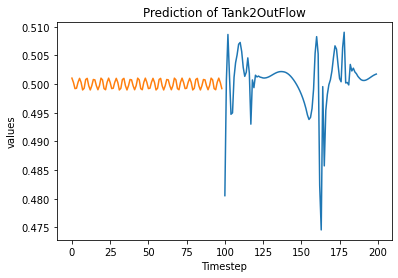

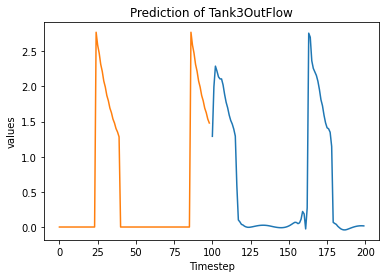

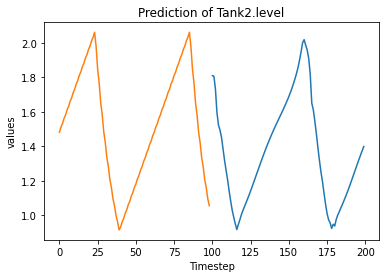

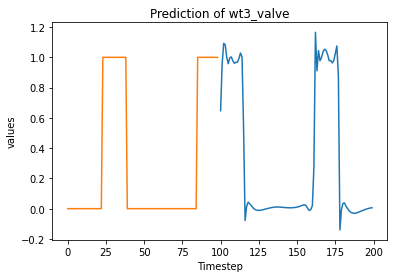

In [4]:
# attr = len(inv_yhat.T)
attr = ["WaterTank1.inFlow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1.Tank1InFlow", "Tank1.Tank2OutFlow", "Tank1.WaterTank2.I1.state", "wt3_valve", "Tank2.puddle", "Tank2.Tank3OutFlow", "Tank2.level"]
# attr = ["wt3_valve", "Tank1InFlow", "Tank1WaterLevel", "Tank3OutFlow", "Tank2.level"]
for i in range(len(attr)):
    title = "Prediction of "+str(attr[i])
#     actual = raw_data[9901:10000,i]
    actual = raw_data[11901:12000,i]
    pred = inv_yhat.T
    pred_df = pd.DataFrame(inv_yhat)
    # specify the range based on the length of predicted output
    index = pd.Index(list(range(100,200)))
    pred_df = pred_df.set_index(index)
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("values")
#     plt.plot(pred[i], label="predicted")
#     plt.plot(actual, label="actual")
    plt.plot(pred_df[i])
    plt.plot(actual)
    plt.show()

## Load the pre-trained surrogate model

In [5]:
from keras.models import load_model

s_model = load_model('Value-Flip.h5')

new_data = scaled_data[12000:14000,:]

# choose a number of time steps
n_steps_in, n_steps_out = 50, 100

# convert into input/output
test_X, test_y = split_sequences(new_data, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

score = s_model.evaluate(test_X, test_y, verbose=0)
# test_yhat = s_model.predict(test_X, verbose=0)
print("%s:  %.2f%%" % (s_model.metrics_names[0], score*100))


print("Prediction is successful!")

loss:  0.07%
Prediction is successful!


### Predict wit faulty data

In [7]:
s_model = load_model('Value-Flip.h5')

data = read_csv('waterTank_Value_Flip.csv', header=0, index_col=0)

# horizontally stack columns
raw_data = data.values
print(f'The shape of the raw_data before scaling is {raw_data.shape}')
#normalize input features
scaler = MinMaxScaler(feature_range=(0, 1))
f_scaled_data = scaler.fit_transform(raw_data)

# n_train = 10000
# dataset = f_scaled_data[0:n_train,:]


new_data = f_scaled_data[0:2000,:]

# choose a number of time steps
n_steps_in, n_steps_out = 50, 100

# convert into input/output
test_X, test_y = split_sequences(new_data, n_steps_in, n_steps_out)
# the dataset knows the number of features, e.g. 2
n_features = X.shape[2]

score = s_model.evaluate(test_X, test_y, verbose=0)
test_yhat = s_model.predict(test_X, verbose=0)
print("%s:  %.2f%%" % (s_model.metrics_names[0], score*100))

resh_test_yhat = yhat.reshape(n_steps_out, n_features)
print(f'The new shape of yhat  is {resh_test_yhat.shape}')
res_inv_yhat = scaler.inverse_transform(resh_test_yhat)
print(res_inv_yhat)


print(len(s_model.metrics_names))
print("Prediction is successful!")

The shape of the raw_data before scaling is (15001, 6)
loss:  3.05%
The new shape of yhat  is (100, 6)
[[ 3.00061297e+00  2.98385572e+00  4.80544806e-01  1.29019761e+00
   1.80935037e+00  6.47287905e-01]
 [ 3.05723381e+00  2.98266745e+00  5.00694692e-01  1.99252796e+00
   1.80637741e+00  9.56161797e-01]
 [ 3.09067678e+00  2.99787879e+00  5.08644044e-01  2.28880405e+00
   1.73258221e+00  1.09165633e+00]
 [ 3.08514404e+00  3.03368068e+00  5.01566350e-01  2.21877909e+00
   1.59531713e+00  1.08355701e+00]
 [ 3.07328272e+00  3.04974484e+00  4.94731694e-01  2.13665104e+00
   1.52321327e+00  1.00002837e+00]
 [ 3.07602668e+00  3.05062842e+00  4.94974554e-01  2.10663080e+00
   1.49341834e+00  9.57982600e-01]
 [ 3.10299611e+00  3.06861591e+00  5.01170397e-01  2.10701847e+00
   1.45067310e+00  9.97359216e-01]
 [ 3.10985231e+00  3.06079674e+00  5.03706753e-01  2.02171183e+00
   1.38344562e+00  1.00241756e+00]
 [ 3.11212206e+00  3.04830742e+00  5.05090714e-01  1.88735545e+00
   1.31687117e+00  9.76

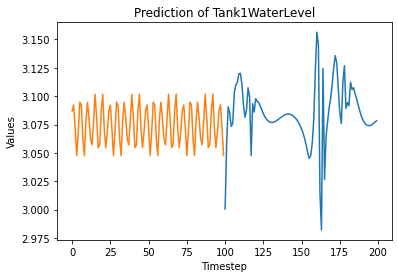

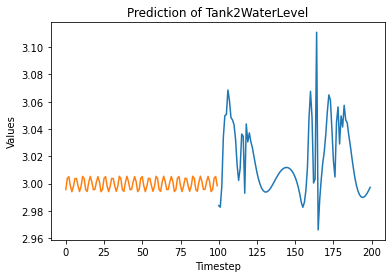

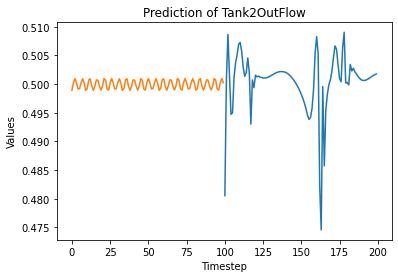

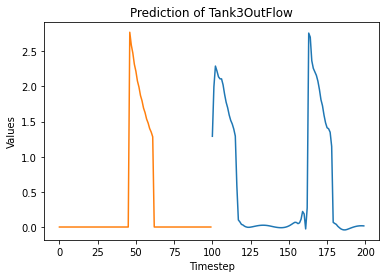

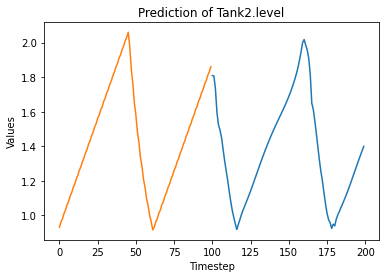

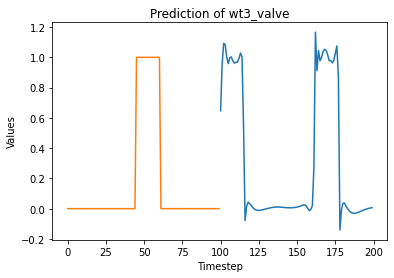

In [8]:
attr = ["WaterTank1.inFlow", "Tank1WaterLevel", "Tank2WaterLevel", "Tank1.Tank1InFlow", "Tank1.Tank2OutFlow", "Tank1.WaterTank2.I1.state", "wt3_valve", "Tank2.puddle", "Tank2.Tank3OutFlow", "Tank2.level"]
for i in range(len(attr)):
    title = "Prediction of "+str(attr[i])
    actual = raw_data[1900:2000,i]
    pred = res_inv_yhat.T
    pred_df = pd.DataFrame(res_inv_yhat)
    # specify the range based on the length of predicted output
    index = pd.Index(list(range(100,200)))
    pred_df = pred_df.set_index(index)
    plt.title(title)
    plt.xlabel("Timestep")
    plt.ylabel("Values")
#     plt.plot(pred[i], label="predicted")
#     plt.plot(actual, label="actual")
    plt.plot(pred_df[i])
    plt.plot(actual)
    plt.show()